In [1]:
# -*- coding: utf-8 -*-
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time
from matplotlib.ticker import MultipleLocator                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
%matplotlib inline

In [2]:
path = os.getcwd().split('TianChi_IJCAI-17_footfall_prediction_code')[0]

#shop_info = pd.read_table(path+'dataset/shop_info.txt',names=['shop_id','city_name','location_id','per_pay','score','comment_cnt','shop_level','cate_1_name','cate_2_name','cate_3_name'],header=None,delimiter=',',encoding='utf8',delim_whitespace=False,index_col=False)
shop_info = pd.read_table(path+'dataset/shop info with count.csv',delimiter=',',encoding='utf8',delim_whitespace=False,index_col=False)

shop_info.index = shop_info['shop_id'].tolist()

In [3]:
def dateRange(start, end):
    days = (datetime.datetime.strptime(end, "%Y-%m-%d") - datetime.datetime.strptime(start, "%Y-%m-%d")).days + 1
    return [datetime.datetime.strftime(datetime.datetime.strptime(start, "%Y-%m-%d") + datetime.timedelta(i), "%Y-%m-%d") for i in xrange(days)]
#len(dateRange('2015-07-01','2016-10-31'))

### cal_total_count_avg_the_whole_time

In [4]:
def cal_total_count_avg_the_whole_time(x):
    start_day = ''
    for day in dateRange('2015-07-01','2016-10-31'):
        if x[day]>0:
            start_day = day
            print start_day
            break
 
    return float(x['2015-07-01':'2016-10-31'].sum()) /  len(x[start_day:'2016-10-31'])
            
def get_total_count_avg_the_whole_time():
    shop_info['total_count_avg'] = shop_info.apply(lambda x: cal_total_count_avg_the_whole_time(x),axis=1)
get_total_count_avg_the_whole_time()

2015-10-10
2015-11-25
2016-06-18
2016-07-19
2015-09-28
2016-01-22
2015-07-02
2016-08-01
2015-10-30
2016-07-01
2015-08-25
2016-02-02
2016-03-30
2015-08-17
2016-07-13
2015-07-02
2015-07-13
2016-08-04
2015-10-10
2016-04-01
2016-01-12
2015-08-19
2015-11-13
2016-02-19
2015-07-13
2015-10-10
2015-09-30
2015-07-16
2015-11-29
2016-03-04
2016-07-19
2015-11-18
2016-08-04
2016-01-16
2015-11-13
2015-11-17
2015-09-23
2015-11-16
2015-07-16
2016-06-19
2015-09-23
2016-05-02
2016-03-03
2016-02-24
2016-08-02
2015-11-18
2016-07-11
2016-07-28
2015-11-11
2016-07-24
2015-07-30
2016-02-29
2016-06-17
2015-11-21
2016-01-29
2015-07-13
2015-09-24
2015-10-30
2016-06-17
2015-10-02
2016-05-12
2015-07-07
2016-06-03
2015-09-29
2015-11-20
2015-11-16
2016-03-27
2016-07-18
2016-04-27
2016-07-01
2016-01-31
2015-11-19
2016-08-06
2016-01-22
2016-03-26
2016-03-07
2016-05-23
2016-05-04
2015-08-31
2016-05-29
2015-11-11
2015-07-10
2015-07-06
2016-02-20
2015-07-08
2015-10-22
2015-11-16
2015-07-01
2015-11-13
2015-07-06
2016-07-05

In [8]:
for day_number in range(1,15): #1～14
    predict_day_col = 'predict_day_'+str(day_number)
    print predict_day_col
    shop_info[predict_day_col] = shop_info['total_count_avg'].apply(lambda x:int(x+0.5))

predict_day_1
predict_day_2
predict_day_3
predict_day_4
predict_day_5
predict_day_6
predict_day_7
predict_day_8
predict_day_9
predict_day_10
predict_day_11
predict_day_12
predict_day_13
predict_day_14


In [ ]:
shop_info.loc[:,'predict_day_1':'predict_day_14'].to_csv('Prediction(average the whole time).csv',sep=',',index=True,columns=None)

### cal_total_count_avg_14_days

'2016-10-18'

True

In [38]:
global spe_day
spe_day = pd.to_datetime('2016-10-31').date() - datetime.timedelta(days=(14-1))
print 'spe_day = ',spe_day
def cal_total_count_avg_14_days(x):
    start_day = ''
    for day in dateRange('2015-07-01','2016-10-31'):
        if x[day]>0:
            start_day = day
            #print start_day
            break
    if pd.to_datetime(start_day).date() < spe_day:
        start_day=spe_day.strftime("%Y-%m-%d")
    if pd.to_datetime(start_day).date()> datetime.datetime(2016, 10, 18).date():print start_day
    return float(x[start_day:'2016-10-31'].sum()) /  14
            
def get_total_count_avg_14_days():
    shop_info['total_count_avg_14_days'] = shop_info.apply(lambda x: cal_total_count_avg_14_days(x),axis=1)
get_total_count_avg_14_days()

spe_day =  2016-10-18


In [57]:
for day_number in range(1,15): #1～14
    predict_day_col = 'predict_day_'+str(day_number)
    print predict_day_col
    shop_info[predict_day_col] = shop_info['total_count_avg_14_days'].apply(lambda x:int(x+0.5))

predict_day_1
predict_day_2
predict_day_3
predict_day_4
predict_day_5
predict_day_6
predict_day_7
predict_day_8
predict_day_9
predict_day_10
predict_day_11
predict_day_12
predict_day_13
predict_day_14


In [60]:
shop_info.loc[:,'predict_day_1':'predict_day_14'].to_csv('Prediction(average in 14 days).csv',sep=',',index=True,columns=None)

### cal_total_count_avg_n_days    n= 21

In [63]:
def cal_total_count_avg_n_days(x,n):
    spe_day = pd.to_datetime('2016-10-31').date() - datetime.timedelta(days=(n-1))
    start_day = ''
    for day in dateRange('2015-07-01','2016-10-31'):
        if x[day]>0:
            start_day = day
            #print start_day
            break
    #print 'spe_day=',spe_day
    if pd.to_datetime(start_day).date() < spe_day:
        start_day=spe_day.strftime("%Y-%m-%d")
    #print start_day
    return float(x[start_day:'2016-10-31'].sum()) /  n
            
def get_total_count_avg_n_days(n):
    print 'spe_day = ',spe_day
    shop_info['total_count_avg_'+str(n)+'_days'] = shop_info.apply(lambda x: cal_total_count_avg_n_days(x,n),axis=1)

n=21
get_total_count_avg_n_days(n)

spe_day =  2016-10-18
spe_day= 2016-10-11
2016-10-11
spe_day= 2016-10-11
2016-10-11
spe_day= 2016-10-11
2016-10-11
spe_day= 2016-10-11
2016-10-11
spe_day= 2016-10-11
2016-10-11
spe_day= 2016-10-11
2016-10-11
spe_day= 2016-10-11
2016-10-11
spe_day= 2016-10-11
2016-10-11
spe_day= 2016-10-11
2016-10-11
spe_day= 2016-10-11
2016-10-11
spe_day= 2016-10-11
2016-10-11
spe_day= 2016-10-11
2016-10-11
spe_day= 2016-10-11
2016-10-11
spe_day= 2016-10-11
2016-10-11
spe_day= 2016-10-11
2016-10-11
spe_day= 2016-10-11
2016-10-11
spe_day= 2016-10-11
2016-10-11
spe_day= 2016-10-11
2016-10-11
spe_day= 2016-10-11
2016-10-11
spe_day= 2016-10-11
2016-10-11
spe_day= 2016-10-11
2016-10-11
spe_day= 2016-10-11
2016-10-11
spe_day= 2016-10-11
2016-10-11
spe_day= 2016-10-11
2016-10-11
spe_day= 2016-10-11
2016-10-11
spe_day= 2016-10-11
2016-10-11
spe_day= 2016-10-11
2016-10-11
spe_day= 2016-10-11
2016-10-11
spe_day= 2016-10-11
2016-10-11
spe_day= 2016-10-11
2016-10-11
spe_day= 2016-10-11
2016-10-11
spe_day= 2016-10-

In [52]:

for day_number in range(1,15): #1～14
    predict_day_col = 'predict_day_'+str(day_number)
    print predict_day_col
    shop_info[predict_day_col] = shop_info['total_count_avg_'+str(n)+'_days'].apply(lambda x:int(x+0.5))

predict_day_1
predict_day_2
predict_day_3
predict_day_4
predict_day_5
predict_day_6
predict_day_7
predict_day_8
predict_day_9
predict_day_10
predict_day_11
predict_day_12
predict_day_13
predict_day_14


In [ ]:
shop_info.loc[:,'predict_day_1':'predict_day_14'].to_csv('Prediction(average in '+str(n)+' days).csv',sep=',',index=True,columns=None)

### 可视化cal_total_count_avg_the_whole_time / cal_total_count_avg_14_days / cal_total_count_avg_n_days

In [ ]:
shop_info.iloc[:,-2:].T.plot()

In [54]:
def draw_ids_avg(ids,start_date='2015-07-01',end_date='2016-10-31',by_week=True,figsize=(70,10)):
    if by_week:
        xmajorLocator   = MultipleLocator(7) #将x轴次刻度标签设置为5的倍数
        ax = plt.subplot(111) 
        ax.xaxis.set_major_locator(xmajorLocator)
    #shop_info.loc[ids,start_date:end_date].mean(axis=0).plot(figsize=(70,10),xlim=())
    shop_info.loc[ids,start_date:end_date].mean(axis=0).plot(figsize=figsize)



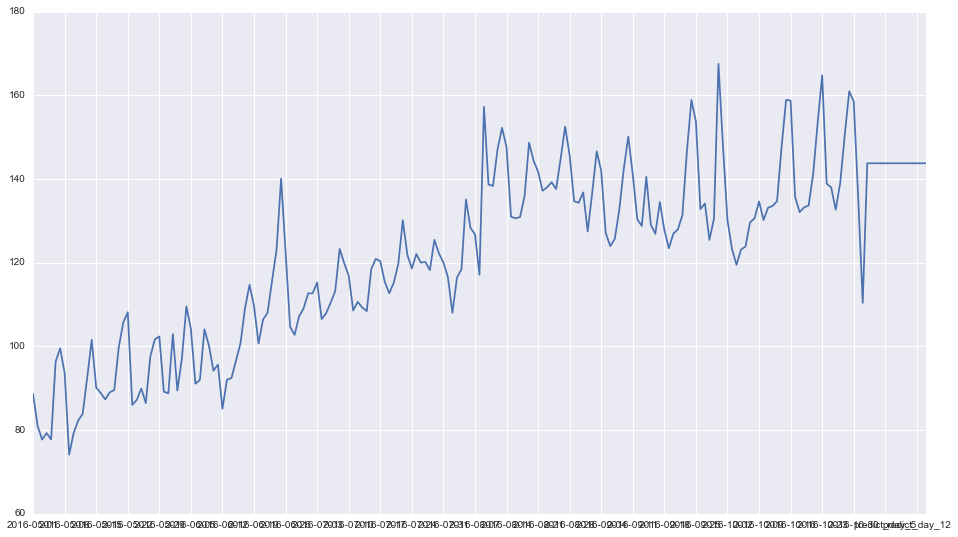

In [64]:
draw_ids_avg(range(1,2001),start_date='2016-05-01',end_date='predict_day_14',by_week=True,figsize=(16,9))

In [12]:
def draw_id(id,start_date='2015-07-01',end_date='2016-10-31',by_week=False,figsize=(16,9)):
    if by_week:
        xmajorLocator = MultipleLocator(7) #将x轴次刻度标签设置为7的倍数
        ax = plt.subplot(111) 
        ax.xaxis.set_major_locator(xmajorLocator)
    shop_info.loc[id,start_date:end_date].plot(legend=True,figsize=figsize)
    

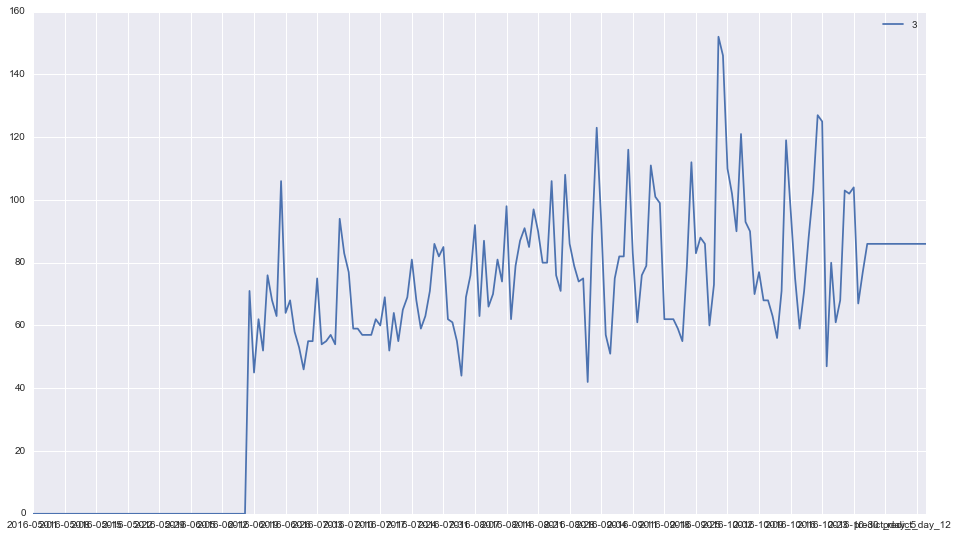

In [65]:
draw_id(3,start_date='2016-05-01',end_date='predict_day_14',by_week=True,figsize=(16,9))